Google Drive Link for video:- https://drive.google.com/drive/folders/1ysSNQQpADec5z3YB0QHcPXO-RGR9jeJs?usp=sharing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Importing the dataset
data = pd.read_csv('bank.csv')
data

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [3]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
# Check for number of unique values in each column
data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [5]:
# List data types for each column
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [6]:
# Describe the data
data.describe(include='all')

age         job  marital  education default       balance  \
count   11162.000000       11162    11162      11162   11162  11162.000000   
unique           NaN          12        3          4       2           NaN   
top              NaN  management  married  secondary      no           NaN   
freq             NaN        2566     6351       5476   10994           NaN   
mean       41.231948         NaN      NaN        NaN     NaN   1528.538524   
std        11.913369         NaN      NaN        NaN     NaN   3225.413326   
min        18.000000         NaN      NaN        NaN     NaN  -6847.000000   
25%        32.000000         NaN      NaN        NaN     NaN    122.000000   
50%        39.000000         NaN      NaN        NaN     NaN    550.000000   
75%        49.000000         NaN      NaN        NaN     NaN   1708.000000   
max        95.000000         NaN      NaN        NaN     NaN  81204.000000   

       housing   loan   contact           day  month      duration  \
count    11162  11162     11162  11162.000000  11162  11162.000000   
unique       2      2         3           NaN     12           NaN   
top         no     no  cellular           NaN    may           NaN   
freq      5881   9702      8042           NaN   2824           NaN   
mean       NaN    NaN       NaN     15.658036    NaN    371.993818   
std        NaN    NaN       NaN      8.420740    NaN    347.128386   
min        NaN    NaN       NaN      1.000000    NaN      2.000000   
25%        NaN    NaN       NaN      8.000000    NaN    138.000000   
50%        NaN    NaN       NaN     15.000000    NaN    255.000000   
75%        NaN    NaN       NaN     22.000000    NaN    496.000000   
max        NaN    NaN       NaN     31.000000    NaN   3881.000000   

            campaign         pdays      previous poutcome deposit  
count   11162.000000  11162.000000  11162.000000    11162   11162  
unique           NaN           NaN           NaN        4       2  
top              NaN           NaN           NaN  unknown      no  
freq             NaN           NaN           NaN     8326    5873  
mean        2.508421     51.330407      0.832557      NaN     NaN  
std         2.722077    108.758282      2.292007      NaN     NaN  
min         1.000000     -1.000000      0.000000      NaN     NaN  
25%         1.000000     -1.000000      0.000000      NaN     NaN  
50%         2.000000     -1.000000      0.000000      NaN     NaN  
75%         3.000000     20.750000      1.000000      NaN     NaN  
max        63.000000    854.000000     58.000000      NaN     NaN

In [7]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
# Convert yes/no columns to 1/0
data['default'] = data['default'].map({'yes': 1, 'no': 0})      # Reference (1)
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

In [9]:
data.describe(include='all')

age         job  marital  education       default  \
count   11162.000000       11162    11162      11162  11162.000000   
unique           NaN          12        3          4           NaN   
top              NaN  management  married  secondary           NaN   
freq             NaN        2566     6351       5476           NaN   
mean       41.231948         NaN      NaN        NaN      0.015051   
std        11.913369         NaN      NaN        NaN      0.121761   
min        18.000000         NaN      NaN        NaN      0.000000   
25%        32.000000         NaN      NaN        NaN      0.000000   
50%        39.000000         NaN      NaN        NaN      0.000000   
75%        49.000000         NaN      NaN        NaN      0.000000   
max        95.000000         NaN      NaN        NaN      1.000000   

             balance       housing          loan   contact           day  \
count   11162.000000  11162.000000  11162.000000     11162  11162.000000   
unique           NaN           NaN           NaN         3           NaN   
top              NaN           NaN           NaN  cellular           NaN   
freq             NaN           NaN           NaN      8042           NaN   
mean     1528.538524      0.473123      0.130801       NaN     15.658036   
std      3225.413326      0.499299      0.337198       NaN      8.420740   
min     -6847.000000      0.000000      0.000000       NaN      1.000000   
25%       122.000000      0.000000      0.000000       NaN      8.000000   
50%       550.000000      0.000000      0.000000       NaN     15.000000   
75%      1708.000000      1.000000      0.000000       NaN     22.000000   
max     81204.000000      1.000000      1.000000       NaN     31.000000   

        month      duration      campaign         pdays      previous  \
count   11162  11162.000000  11162.000000  11162.000000  11162.000000   
unique     12           NaN           NaN           NaN           NaN   
top       may           NaN           NaN           NaN           NaN   
freq     2824           NaN           NaN           NaN           NaN   
mean      NaN    371.993818      2.508421     51.330407      0.832557   
std       NaN    347.128386      2.722077    108.758282      2.292007   
min       NaN      2.000000      1.000000     -1.000000      0.000000   
25%       NaN    138.000000      1.000000     -1.000000      0.000000   
50%       NaN    255.000000      2.000000     -1.000000      0.000000   
75%       NaN    496.000000      3.000000     20.750000      1.000000   
max       NaN   3881.000000     63.000000    854.000000     58.000000   

       poutcome       deposit  
count     11162  11162.000000  
unique        4           NaN  
top     unknown           NaN  
freq       8326           NaN  
mean        NaN      0.473840  
std         NaN      0.499338  
min         NaN      0.000000  
25%         NaN      0.000000  
50%         NaN      0.000000  
75%         NaN      1.000000  
max         NaN      1.000000

In [10]:
# Check for the distribution of the 'pcoutome' variable
data['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [11]:
# Check for the distribution of the 'deposit' variable
data['deposit'].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [12]:
# Check for the distribution of the 'job' variable
data['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [13]:
# Since number of unknown values is very less, we can drop them
data = data[data['job'] != 'unknown']

In [14]:
# Check for distribution of the 'education' variable   
data['education'].value_counts()

education
secondary    5461
tertiary     3680
primary      1493
unknown       458
Name: count, dtype: int64

In [15]:
# Since number of unknown values is very less, we can drop them
data = data[data['education'] != 'unknown']

In [16]:
# For poutcome, we can do an encoding where yes = 1, no = -1 and unknown/others = 0
data['poutcome'] = data['poutcome'].map({'success': 1, 'failure': -1, 'other': 0, 'unknown': 0})

# For education, we can do an encoding where primary = 1, secondary = 2, tertiary = 3 since there is an order in the values
data['education'] = data['education'].map({'primary': 1, 'secondary': 2, 'tertiary': 3})

<Figure size 1000x1000 with 0 Axes>

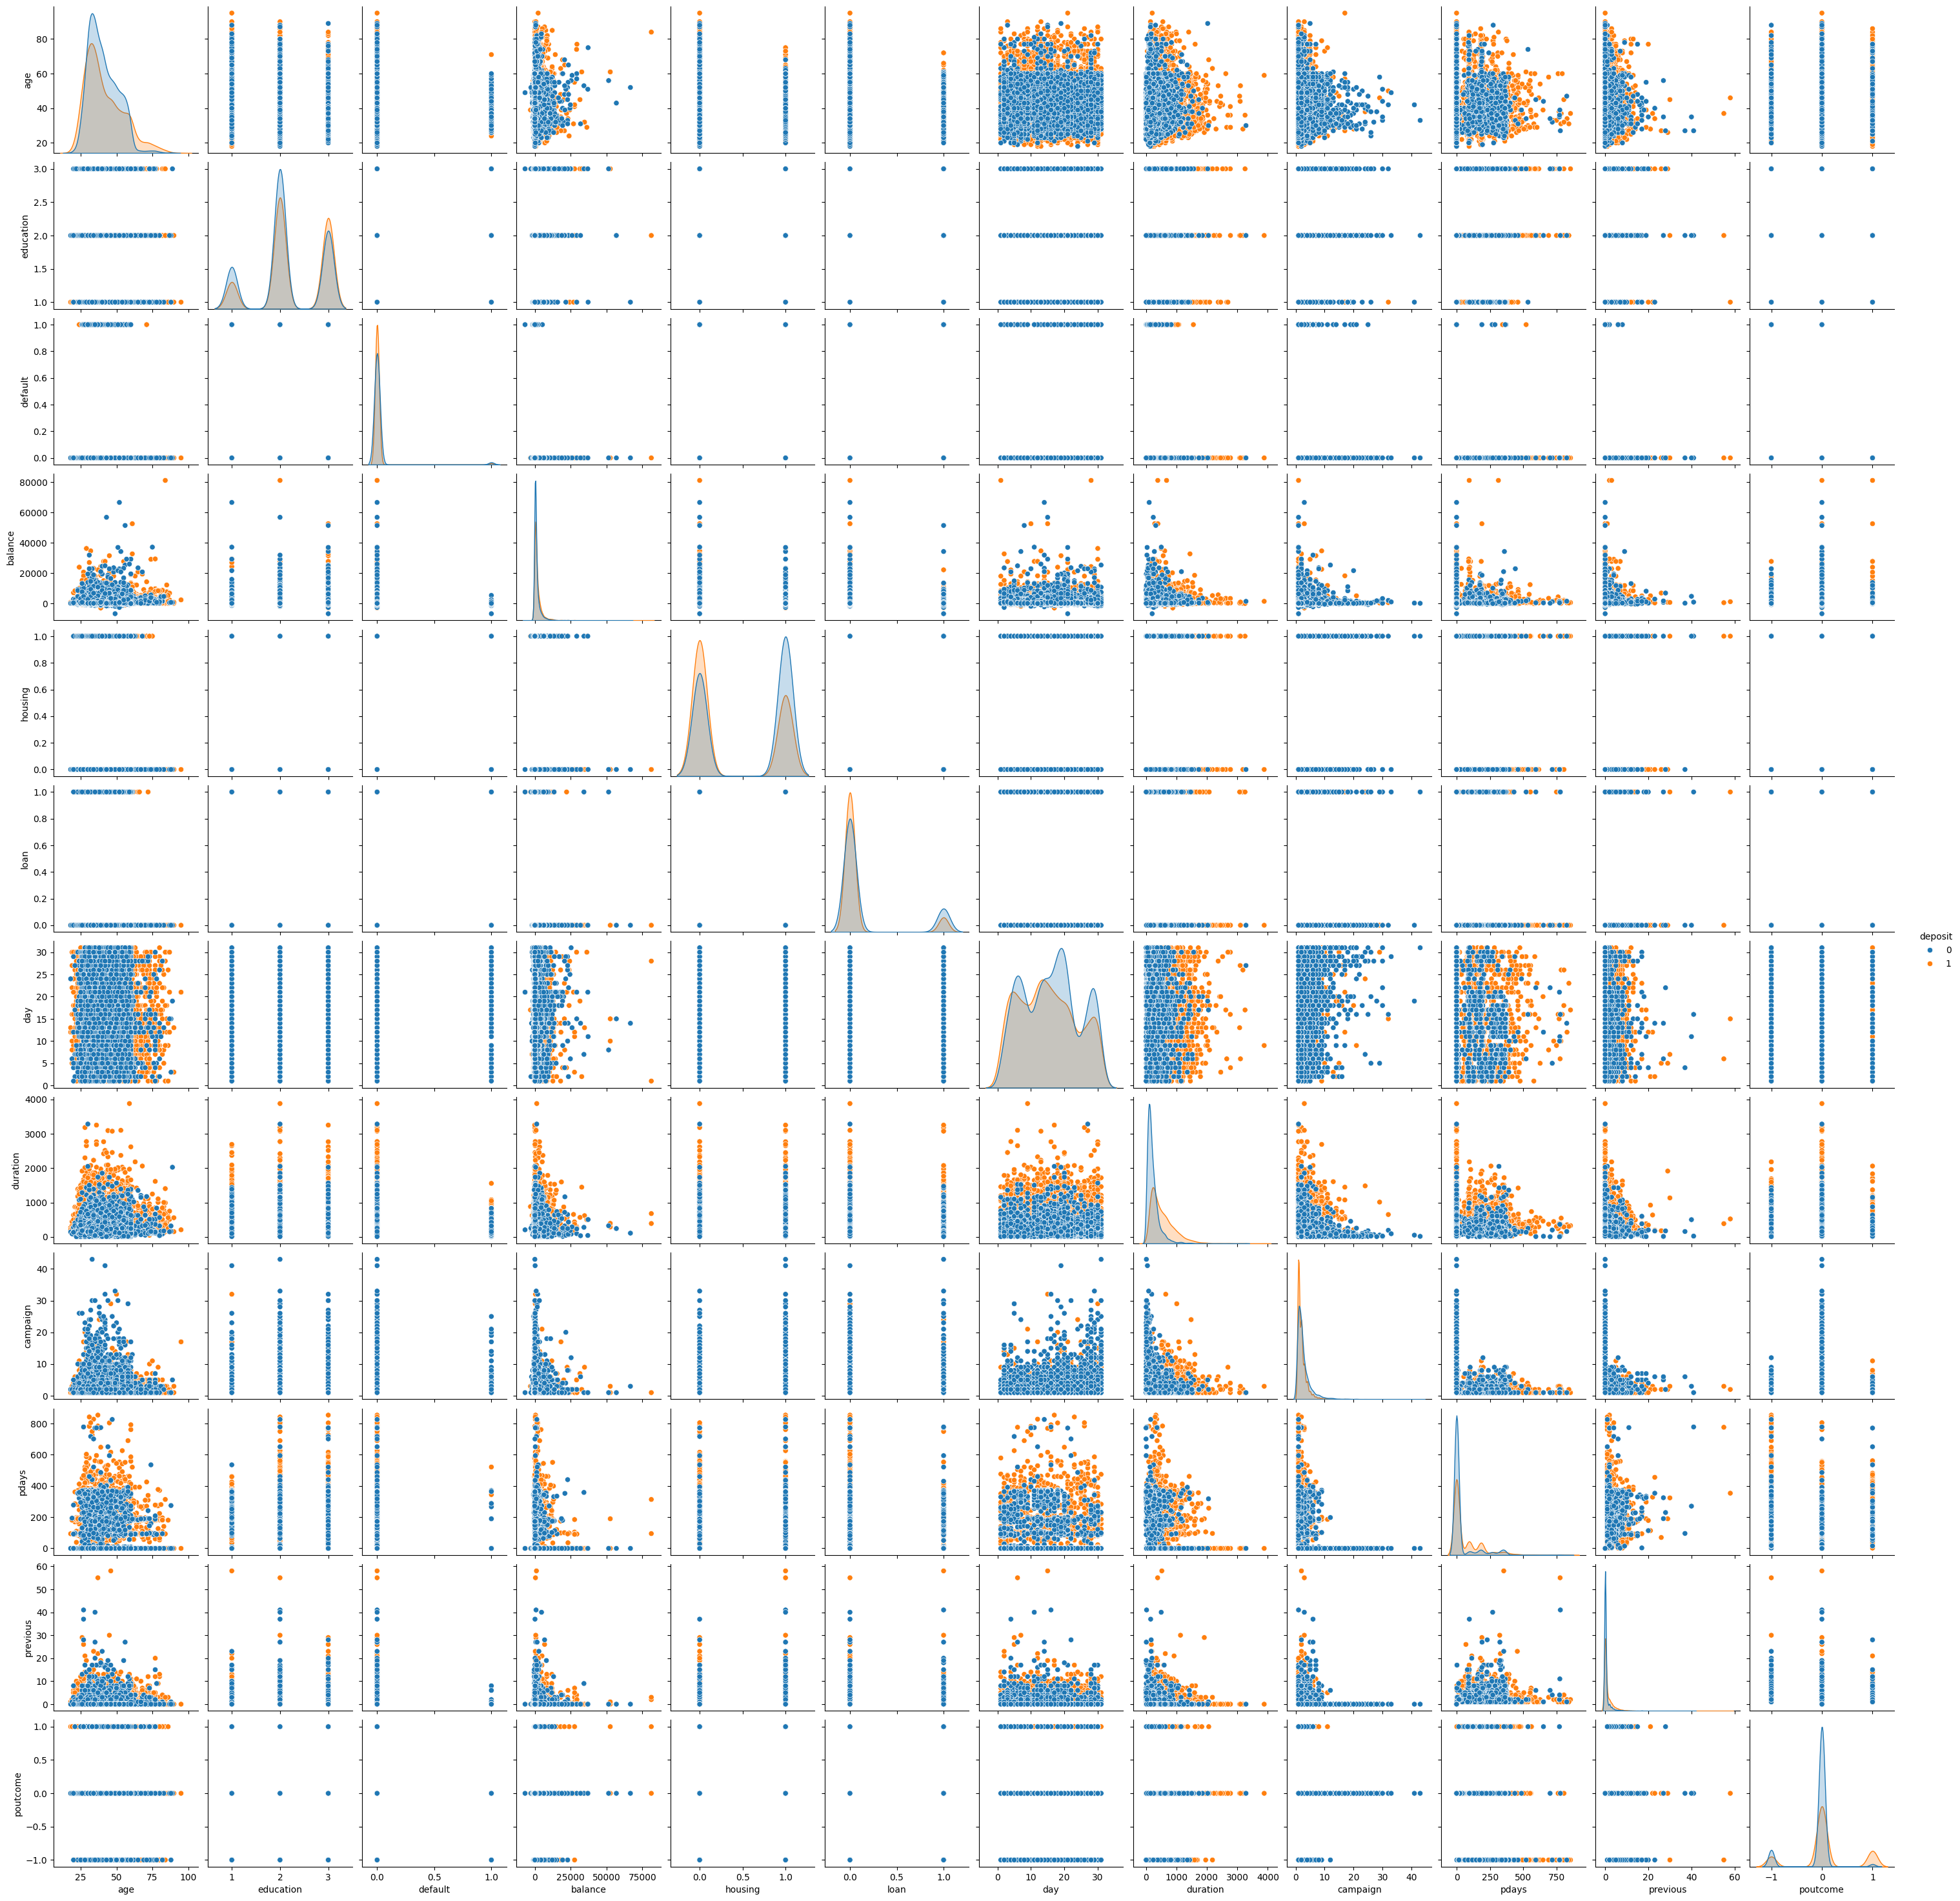

In [17]:
# Pair plot with hue as 'deposit'
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='deposit')
plt.show()

Col_name = age


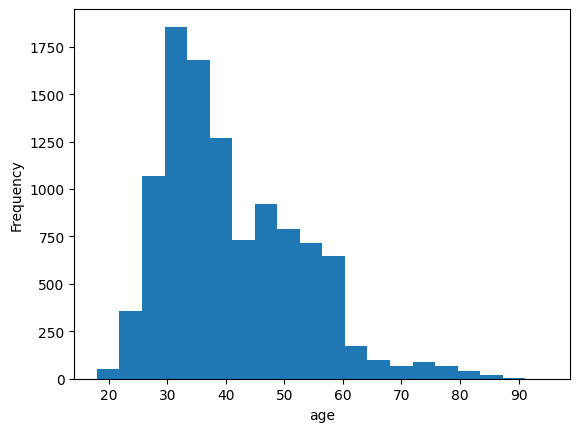

Col_name = job


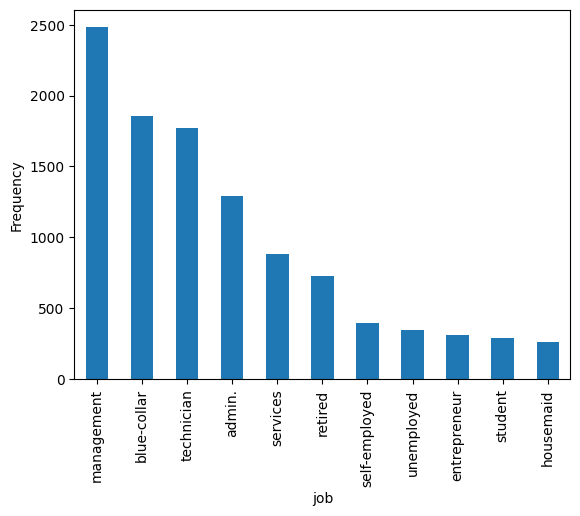

Col_name = marital


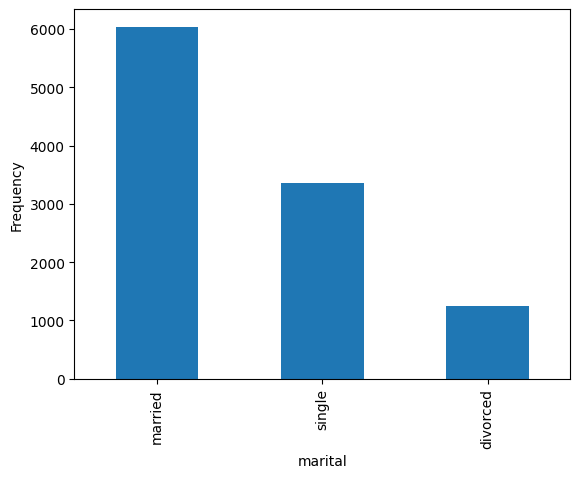

Col_name = education


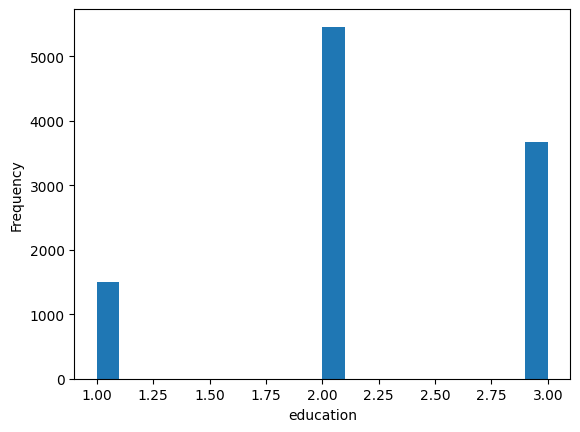

Col_name = default


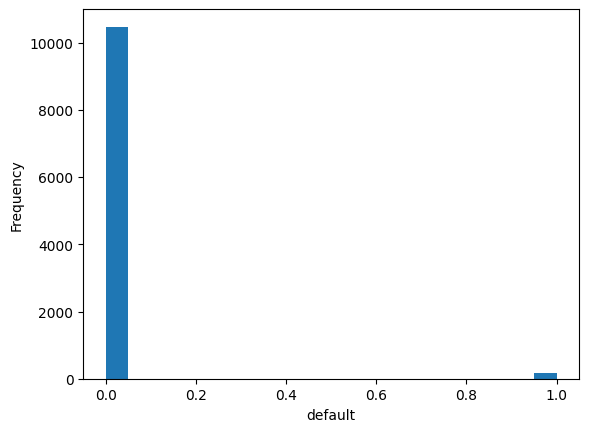

Col_name = balance


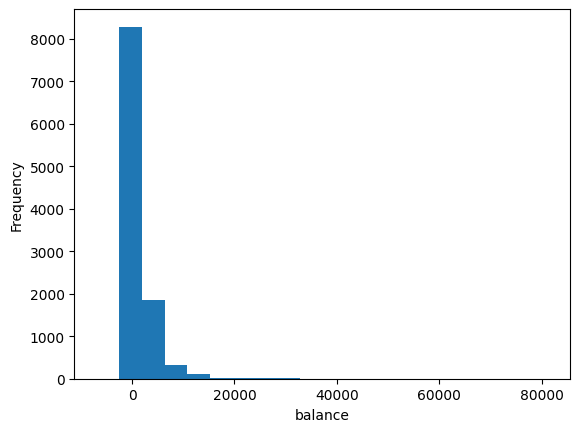

Col_name = housing


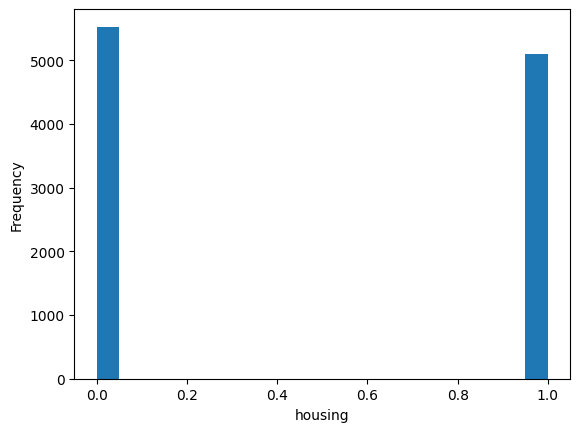

Col_name = loan


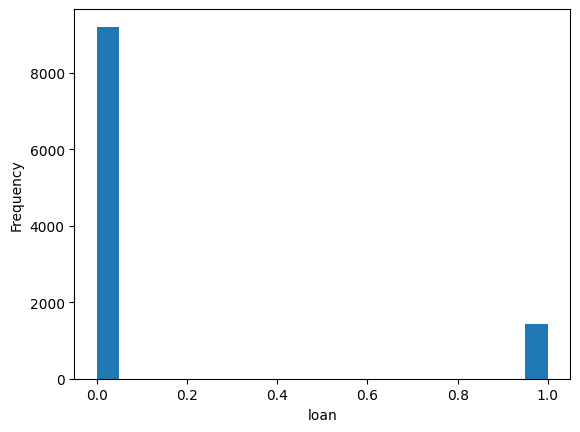

Col_name = contact


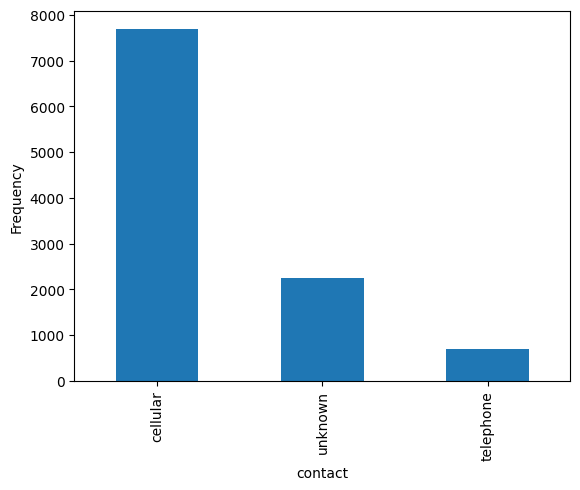

Col_name = day


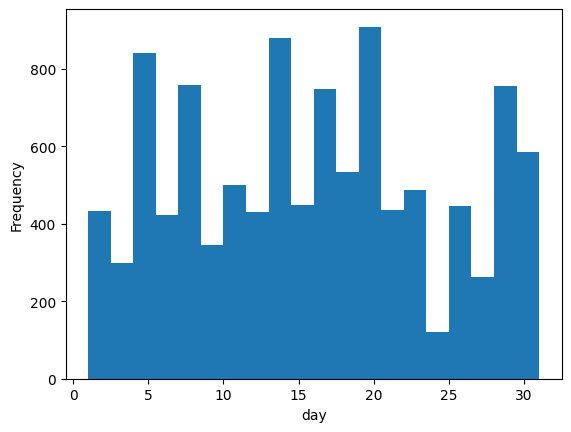

Col_name = month


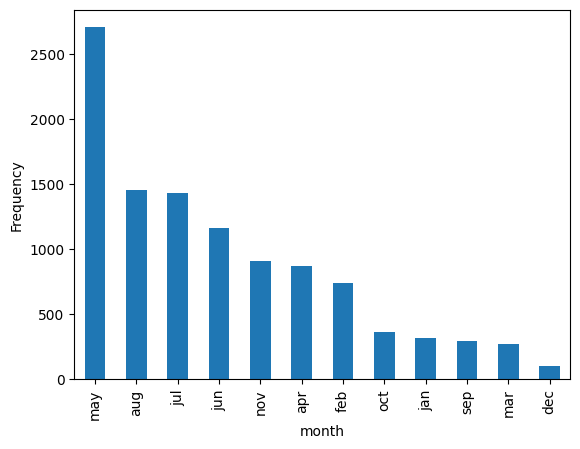

Col_name = duration


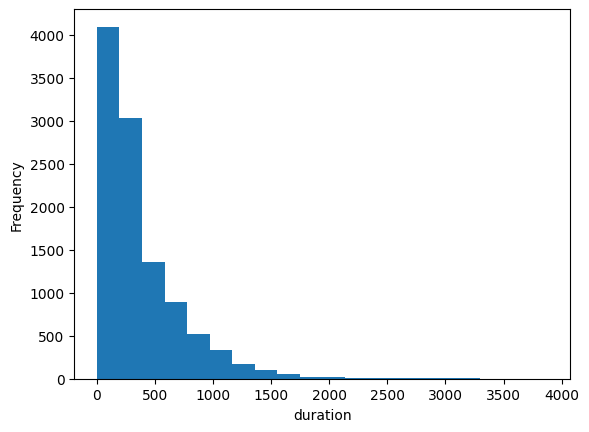

Col_name = campaign


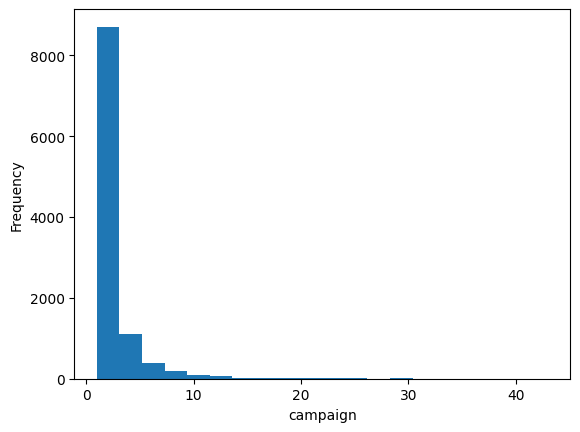

Col_name = pdays


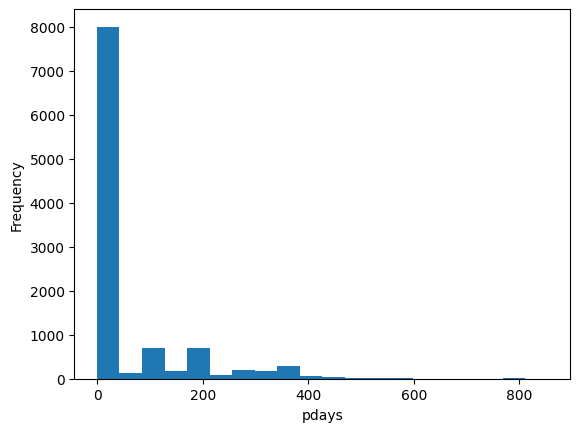

Col_name = previous


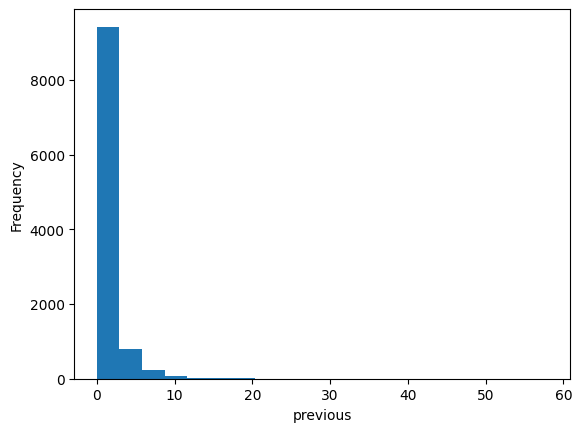

Col_name = poutcome


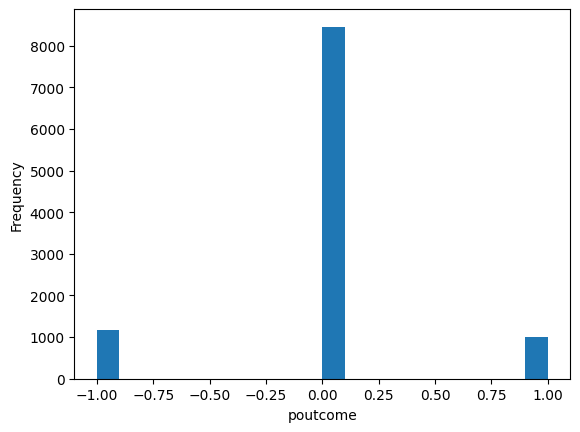

Col_name = deposit


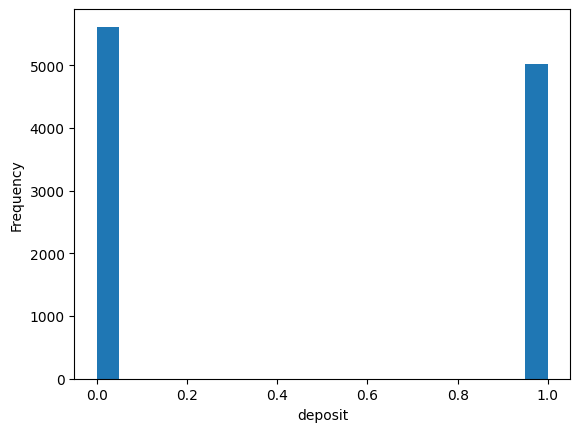

In [ ]:
# Print bar plot for all variables 
for col in data.columns.values:
    print(f'Col_name = {col}')
    if data[col].dtypes == 'int64':     # If datatype is int64 thn we can directly plot a histogram
        plt.hist(data[col], bins=20)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    elif data[col].dtypes == 'object':  # If datatype is object then we need to use .plot
        data[col].value_counts().plot(kind = 'bar')     
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


In [19]:
# Map months to integers according to financial year
month_map = {'apr': 1, 'may': 2, 'jun': 3, 'jul': 4, 'aug': 5, 'sep': 6, 'oct': 7, 'nov': 8, 'dec': 9, 'jan': 10, 'feb': 11, 'mar': 12}
data['month'] = data['month'].map(month_map)

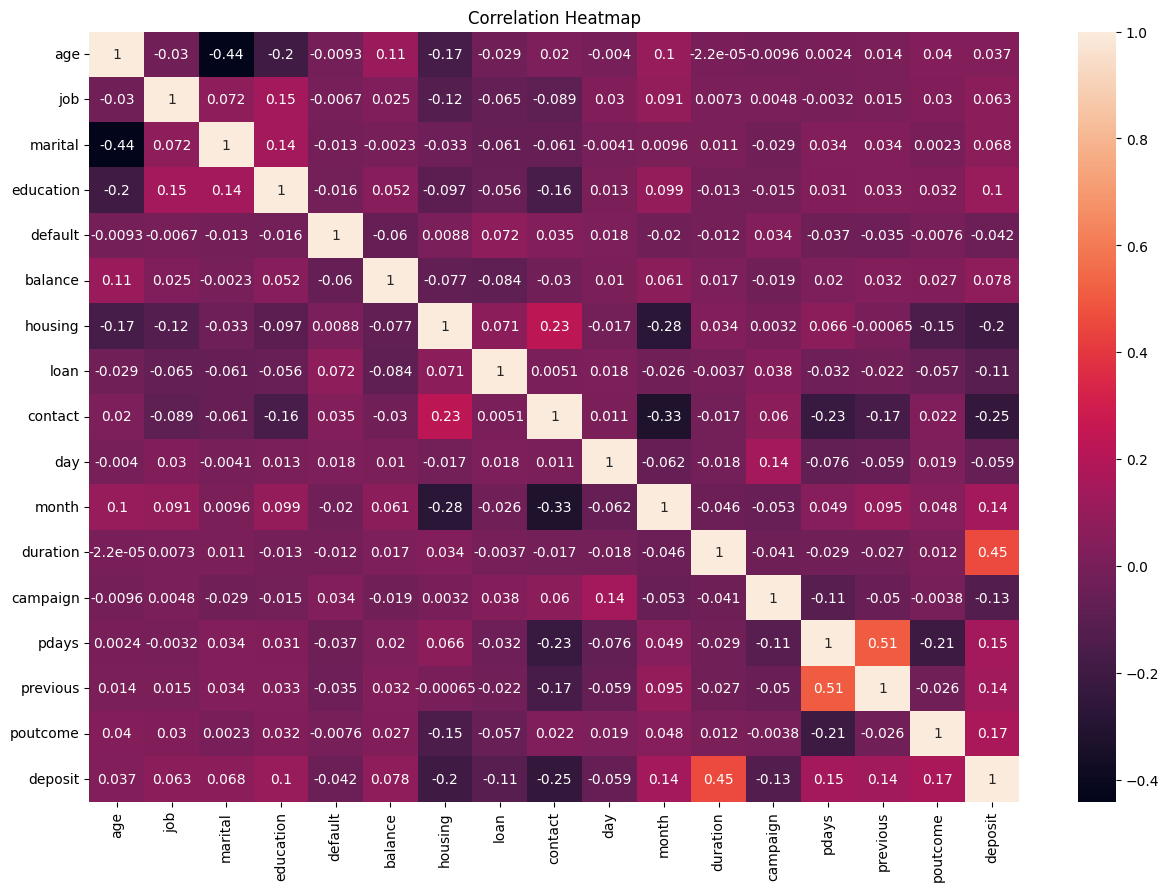

In [ ]:
# Perform Label Encoding for the object columns
from sklearn.preprocessing import LabelEncoder
data_new = data.copy()      # Make a copy of data and perform encoding on new copy
le = LabelEncoder()         
for col in data_new.columns.values:
    if data_new[col].dtypes == 'object':
        data_new[col] = le.fit_transform(data_new[col].astype('str'))   # Apply Label Encoder to all columns with datatype object

# Check for the correlation matrix
corr_matrix = data_new.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Input variables:
   ## Bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. education (categorical: "unknown","secondary","primary","tertiary")
   5. default: has credit in default? (binary: "yes","no")
   6. balance: average yearly balance, in euros (numeric) 
   7. housing: has housing loan? (binary: "yes","no")
   8. loan: has personal loan? (binary: "yes","no")

   ## Related with the last contact of the current campaign:
   9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10. day: last contact day of the month (numeric)
  11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12. duration: last contact duration, in seconds (numeric)
   ## Other attributes:
  13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. previous: number of contacts performed before this campaign and for this client (numeric)
  16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

# Output variable (desired target):
  17. y - has the client subscribed a term deposit? (binary: "yes","no")

Source:- https://archive.ics.uci.edu/dataset/222/bank+marketing

## Observation
1. The default column has a very skewed distribution with >75% values being no. This is a very bad feature for model training and needs to be dropped
2. Duration column denotes the duration of contact which is unknown before the call and after the call we know the duration, so keeping such a column in a prediction model doesn't make sense. Also duration has a high correlation with the output i.e. if duration = 0, then output = no. All these reasons motivate us to drop this column. (Source: https://archive.ics.uci.edu/dataset/222/bank+marketing)
3. The month column has been mapped to integers based on financial year.
4. Contact column has a skewed distribution and seems unrelated to the target variable so we can drop it

## Usable Variables:
1. Age
2. Job
3. Marital
4. Education
5. Balance
6. Housing
7. Loan
8. Day
9. Month
10. Campaign
11. Pdays
12. Previous
13. Poutcome

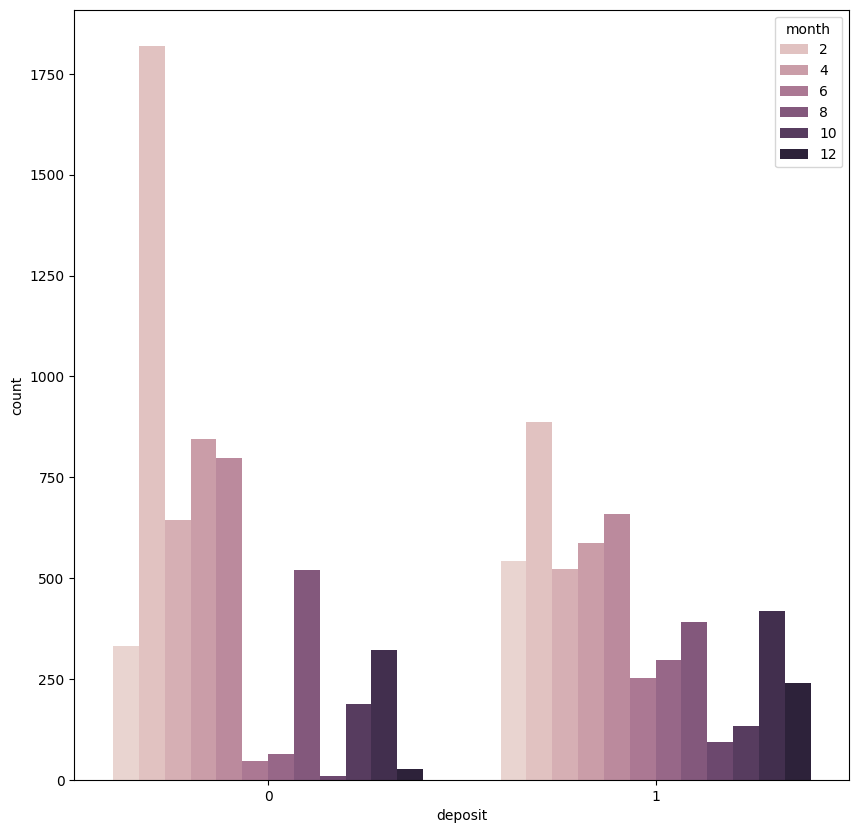

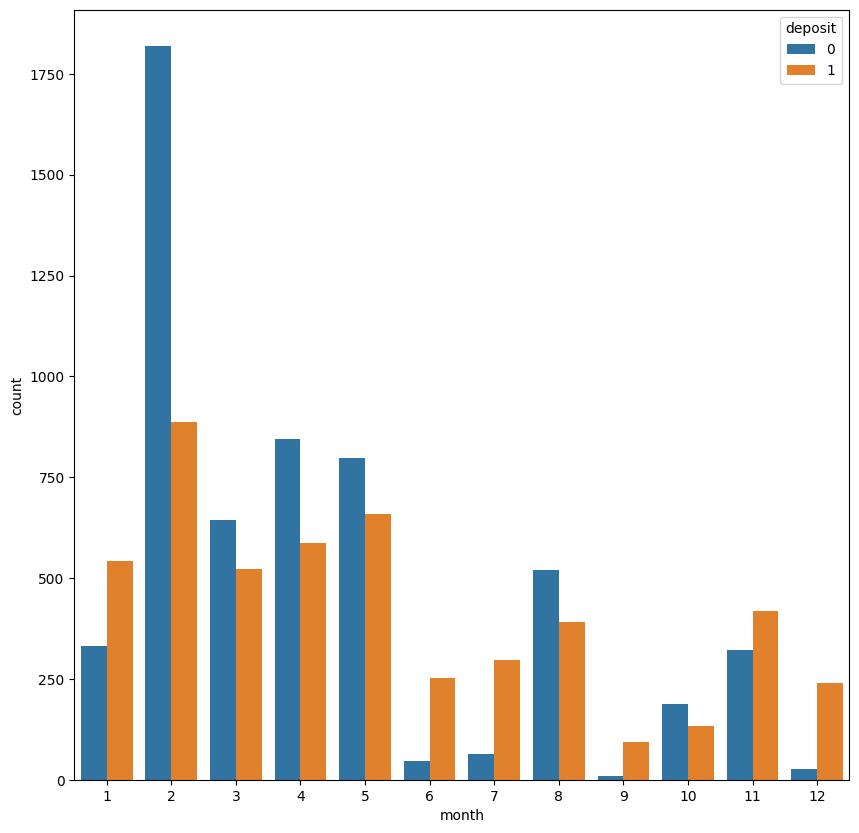

In [ ]:
# Plot variation of deposit for different months
plt.figure(figsize=(10, 10))
sns.countplot(x='deposit', hue='month', data=data)  
plt.show()

plt.figure(figsize=(10, 10))
sns.countplot(x='month', hue='deposit', data=data)
plt.show()

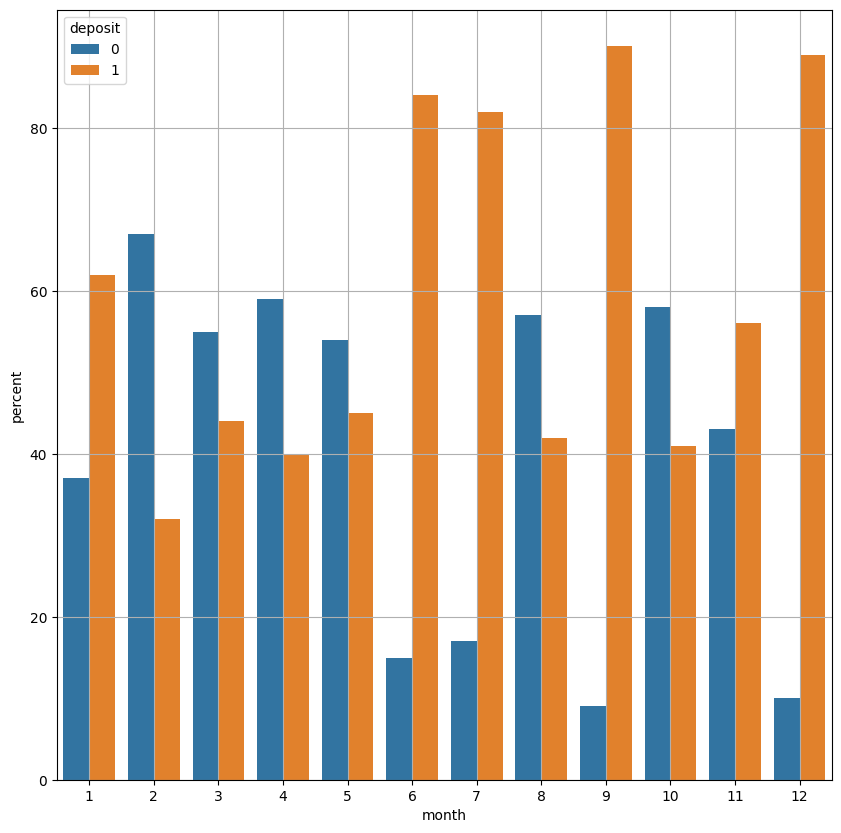

In [ ]:
# Plot percent of yes for deposit (i.e. deposit = 1) vs months
data_new['count'] = 1
data_grouped = data_new.groupby(['month', 'deposit']).count().reset_index()     # Group data by month and deposit to get number of 1s and 0s per month

data_grouped['percent'] = 0

for i in range(len(data_grouped)):
    month = data_grouped.iloc[i]['month']
    deposit = data_grouped.iloc[i]['deposit']
    count = data_grouped.iloc[i]['count']       # Total number of 0s/1s for that month
    total = data_grouped[data_grouped['month'] == month]['count'].sum()     # Total entries for that month
    data_grouped.at[i, 'percent'] = (count*100) // total    # Find percentage of 0s/1s for that month

plt.figure(figsize=(10, 10))
sns.barplot(x='month', y='percent', hue='deposit', data=data_grouped)
plt.grid()
plt.show()


Label Encoder uses an inherent ordering of data entries for a single column. This is detrimental for a feature where there is no ordering eg. jobs, marital status. For such columns we need to use one-hot encoding. 

In [23]:
# Print all columns in data with data types
for col in data.columns.values:
    print(f'{col} | {data[col].dtypes}')


age | int64
job | object
marital | object
education | int64
default | int64
balance | int64
housing | int64
loan | int64
contact | object
day | int64
month | int64
duration | int64
campaign | int64
pdays | int64
previous | int64
poutcome | int64
deposit | int64


In [ ]:
# Drop default, duration and contact columns due to reasons mentioned earlier
data.drop('default', axis=1, inplace=True)
data.drop('duration', axis=1, inplace=True)
data.drop('contact', axis=1, inplace=True)

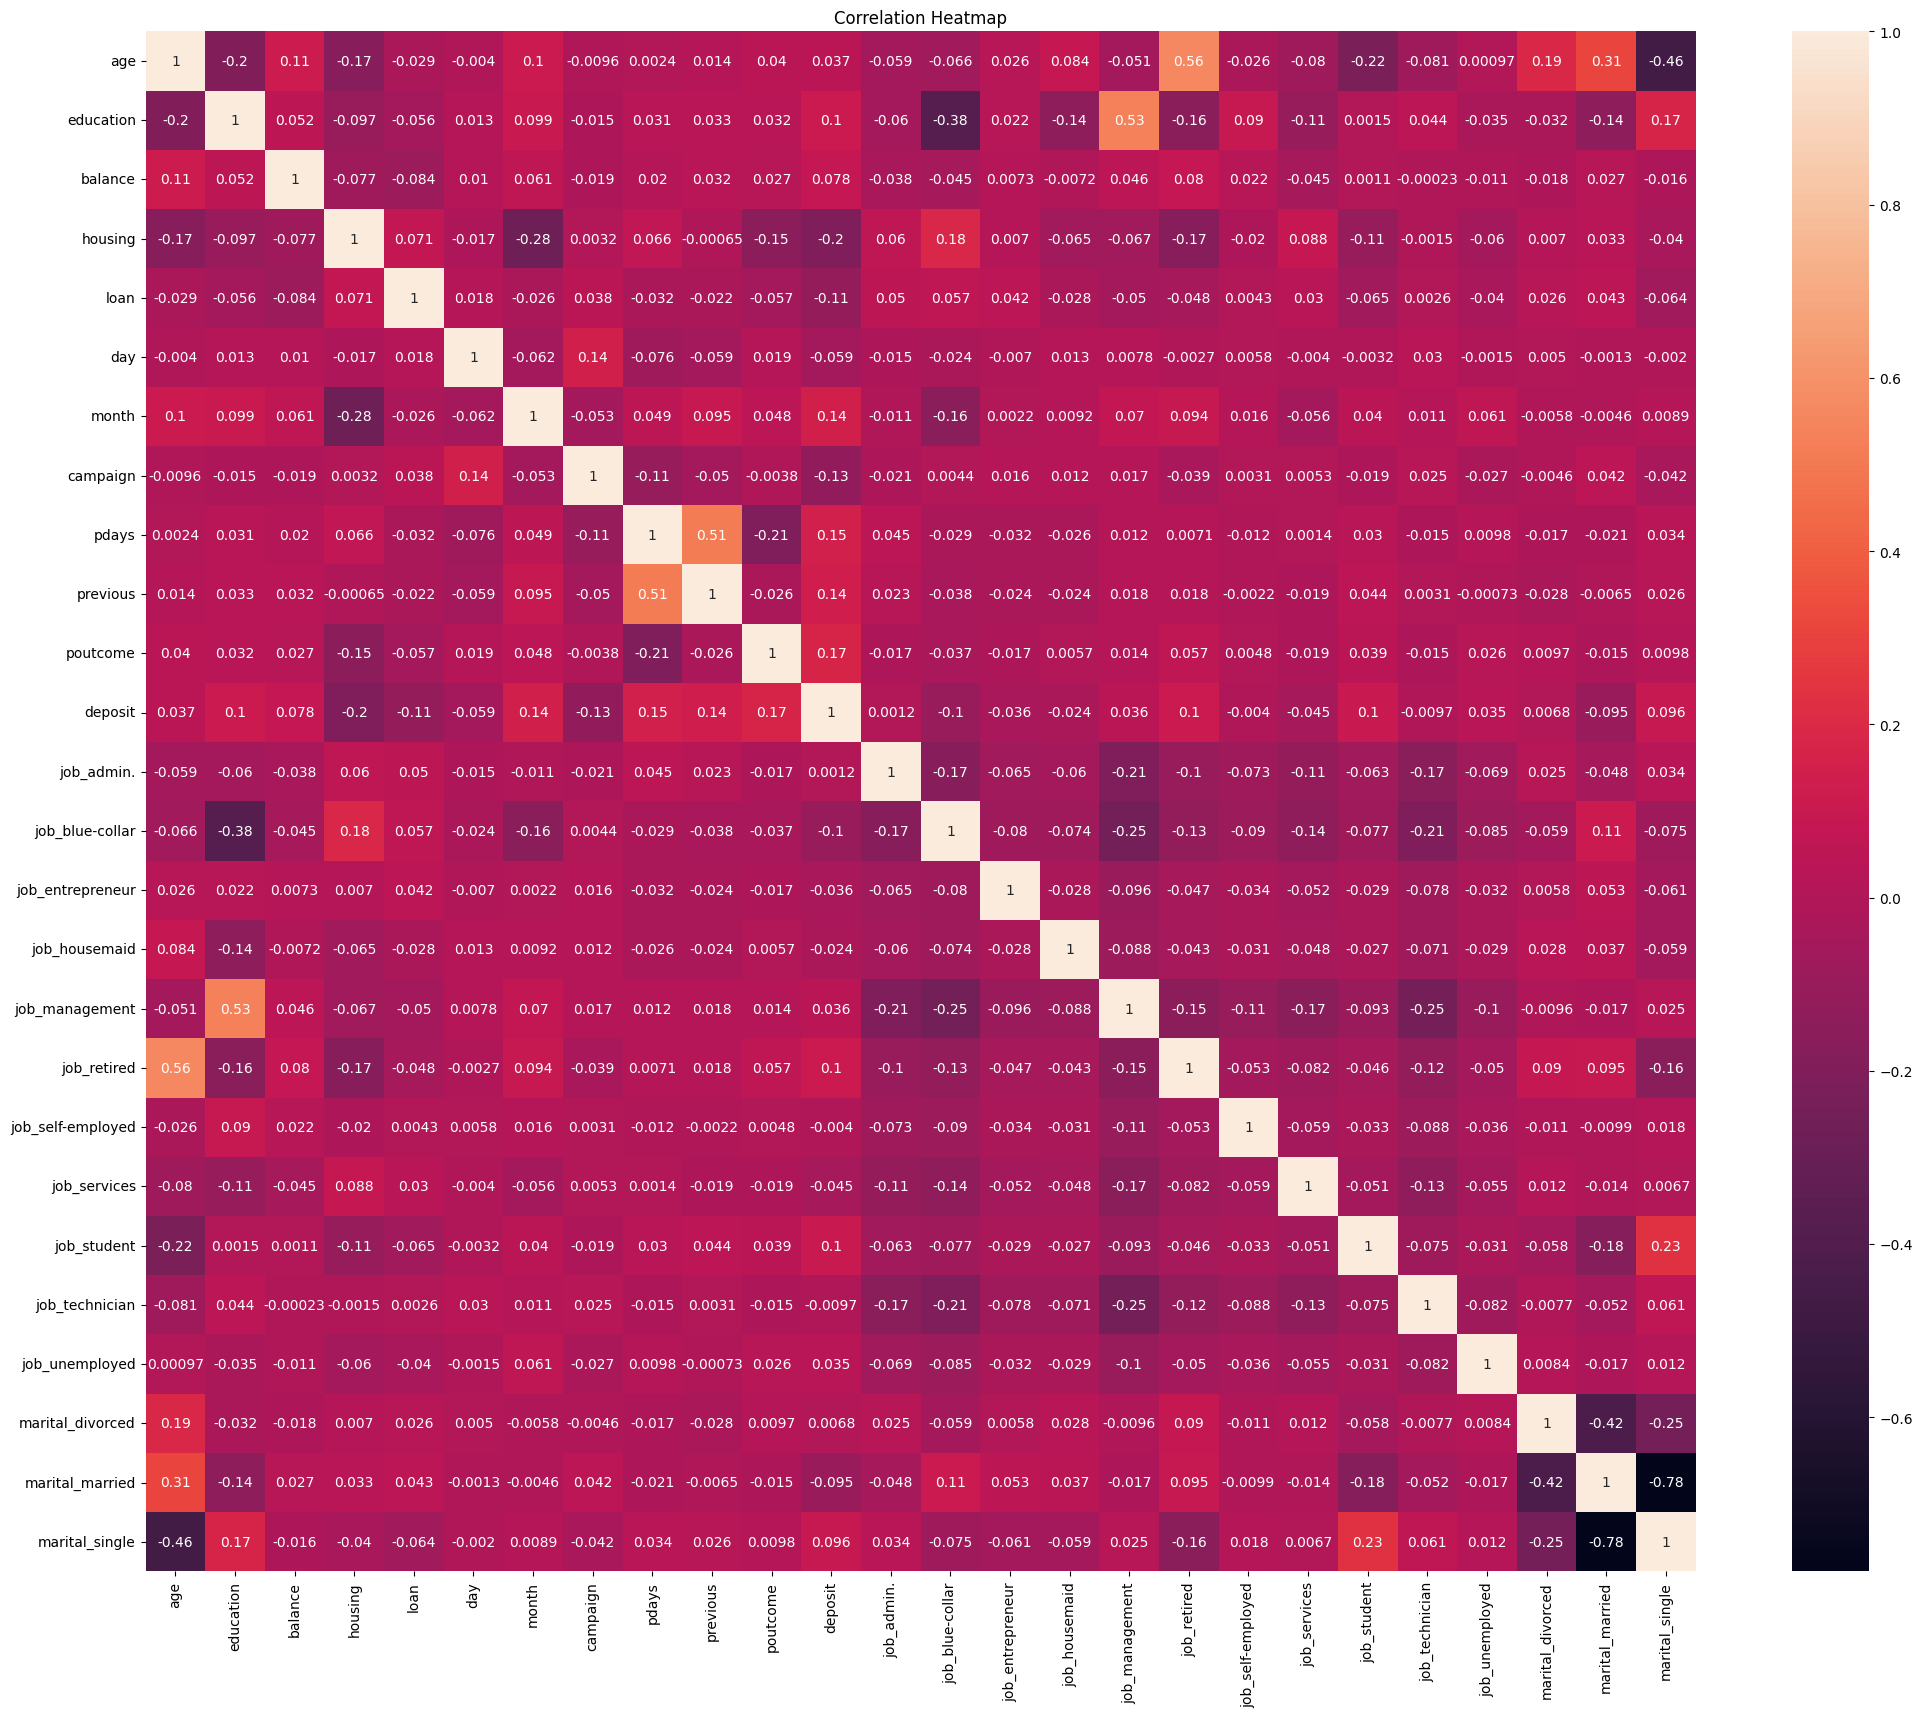

In [25]:
# Perform one hot encoding for jobs, marital status
data_new = data.copy()  # Discard the previous label encoded data

data_new = pd.get_dummies(data_new, columns=['job', 'marital'])     # Perform one hot encoding for the 'job' and 'marital' columns

# Plot the correlation matrix
corr_matrix = data_new.corr()

plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Print data types of all columns
for col in data_new.columns.values:
    print(f'{col} | {data_new[col].dtypes}')

age | int64
education | int64
balance | int64
housing | int64
loan | int64
day | int64
month | int64
campaign | int64
pdays | int64
previous | int64
poutcome | int64
deposit | int64
job_admin. | bool
job_blue-collar | bool
job_entrepreneur | bool
job_housemaid | bool
job_management | bool
job_retired | bool
job_self-employed | bool
job_services | bool
job_student | bool
job_technician | bool
job_unemployed | bool
marital_divorced | bool
marital_married | bool
marital_single | bool


## Metrics to be used:
- ### Metric: 
1. ROC-AUC
- ### Reason: 
1. ROC-AUC is being used as a metric as it is independent of thresholds and gives a broader view of the performance than simple accuracy at a single threshold
2. For our model, we need to select optimal hyperparameters for which the metric should be independent of the threshold and hence evaluation metric of ROC-AUC is best for Grid Search

### Continuous variables 
- These variables need to be standardised before feeding to model since different variables are spread over different ranges and we need the model be unaffected due to this.

### Discrete variables
- These variables have been used as it is without reducing any variables 

In [27]:
from sklearn.model_selection import train_test_split # To perform a train-test split of the data
from sklearn.preprocessing import StandardScaler     # To standardise the data before feeding it to the model
scaler = StandardScaler()

In [28]:
X = data_new.drop('deposit', axis=1)    # Separate the features from the true labels

# Normalise the data using standard scaler
X = scaler.fit_transform(X)

y = data_new['deposit']     # Separate the true labels from the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Perform a train-test split

In [ ]:
# Perform grid search for SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV        # Reference (2)

In [30]:
# Define parameter grid for grid-search for SVM
grid = {'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01]}

kernel = 'rbf'  # Define kernel for the svm model

svc = SVC(kernel=kernel, probability=True)  # Define the model
grid_search_svm = GridSearchCV(svc, grid, cv = 5, verbose=2, scoring = 'roc_auc', n_jobs = -1)  # Perform grid search

grid_search_svm.fit(X_train, y_train)   # Fit the model

# Print the best parameters
print(grid_search_svm.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 10, 'gamma': 0.01}


In [31]:
print(f'Best score from Grid Search: {grid_search_svm.best_score_}')

Best score from Grid Search: 0.7292271327763032


In [ ]:
# Import the necessary libraries
from sklearn.neural_network import MLPClassifier 

In [52]:
# Define parameter grid for grid-search for Neural Network with one hidden layer
grid = {'hidden_layer_sizes': [(10,), (20, ), (30, ), (40, ), (50, )], 'alpha': [0.01, 0.1, 0.5, 1, 5]}

nn = MLPClassifier(activation = 'relu', max_iter = 1000)    # Define the model
grid_search_nn = GridSearchCV(nn, grid, cv = 5, verbose=2, scoring = 'roc_auc', n_jobs = -1)    # Perform grid search

grid_search_nn.fit(X_train, y_train)    # Fit the model

# Print the best parameters
print(grid_search_nn.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'alpha': 0.5, 'hidden_layer_sizes': (30,)}


In [53]:
print(f'Best score from Grid Search: {grid_search_nn.best_score_}')

Best score from Grid Search: 0.7376349356444363


In [36]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Define parameter grid for grid-search for Random Forest
grid = {'max_depth': [5, 10, 20, 30, 40, 50], 'max_features': [None, 'sqrt', 'log2']}

rf = RandomForestClassifier()  # Define the model
grid_search_rf = GridSearchCV(rf, grid, cv = 5, verbose=2, scoring = 'roc_auc', n_jobs = -1) # Perform grid search

grid_search_rf.fit(X_train, y_train) # Fit the model

# Print the best parameters
print(grid_search_rf.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'max_depth': 10, 'max_features': 'sqrt'}


In [38]:
print(f'Best score from Grid Search: {grid_search_rf.best_score_}')

Best score from Grid Search: 0.7694920846775967


# Best Hyperparameters
1. SVM:- C = 10, $\gamma$ = 0.01
2. Neural Netwrok:- $\alpha$ = 0.5, hidden_layer_sizes = (30,)
3. Random Forest Classifier:- max_depth = 10, max_features = 'sqrt'

# Best Scores
1. SVM:- 0.729
2. NN:- 0.738
3. RF:- 0.769

In [ ]:
# To calculate permutation importance
from sklearn.inspection import permutation_importance       # Reference (3) 

In [ ]:
# Convert X_train, X_test to df
X_train_df = pd.DataFrame(X_train, columns=data_new.columns.drop('deposit'))
X_test_df = pd.DataFrame(X_test, columns=data_new.columns.drop('deposit'))

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


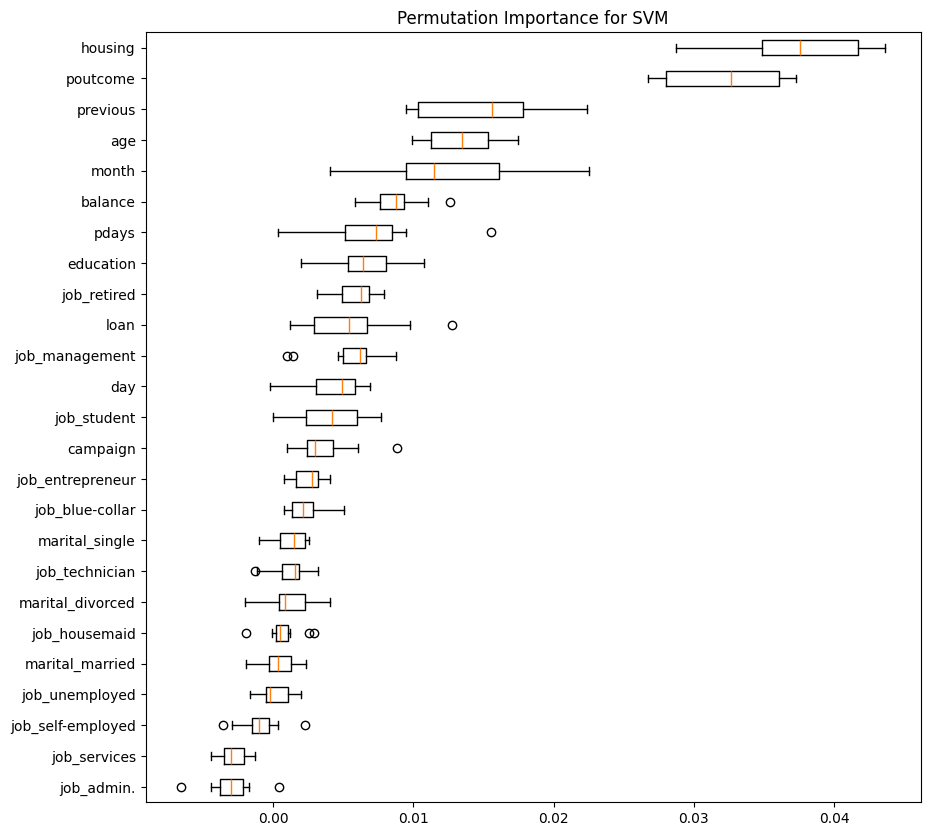

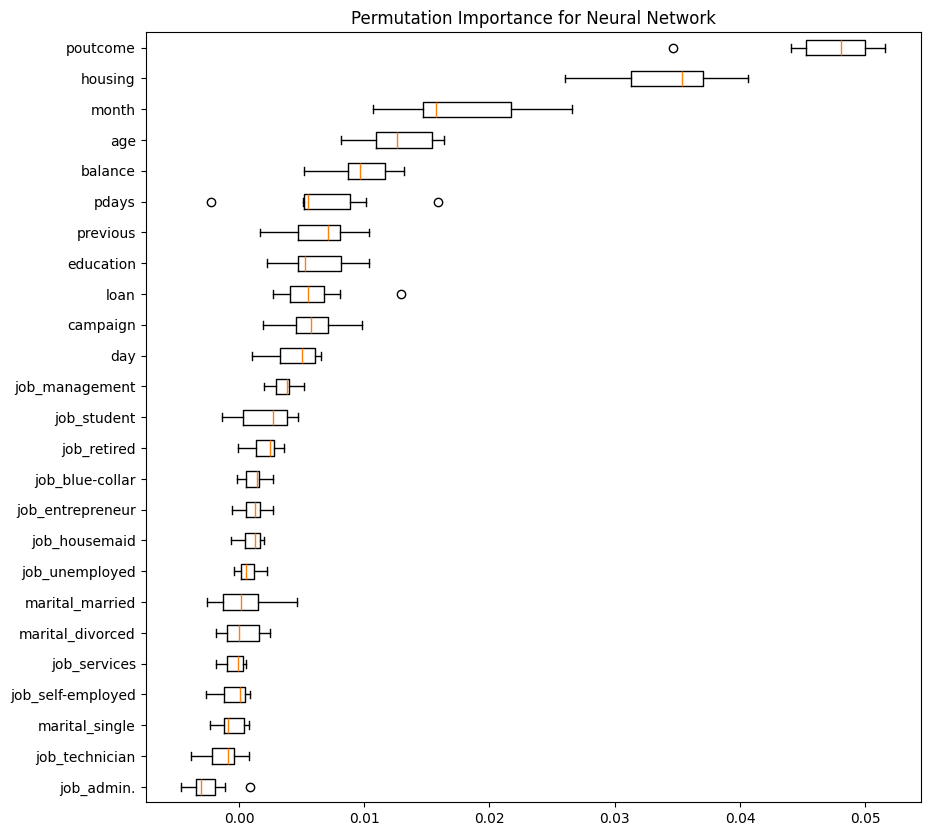

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


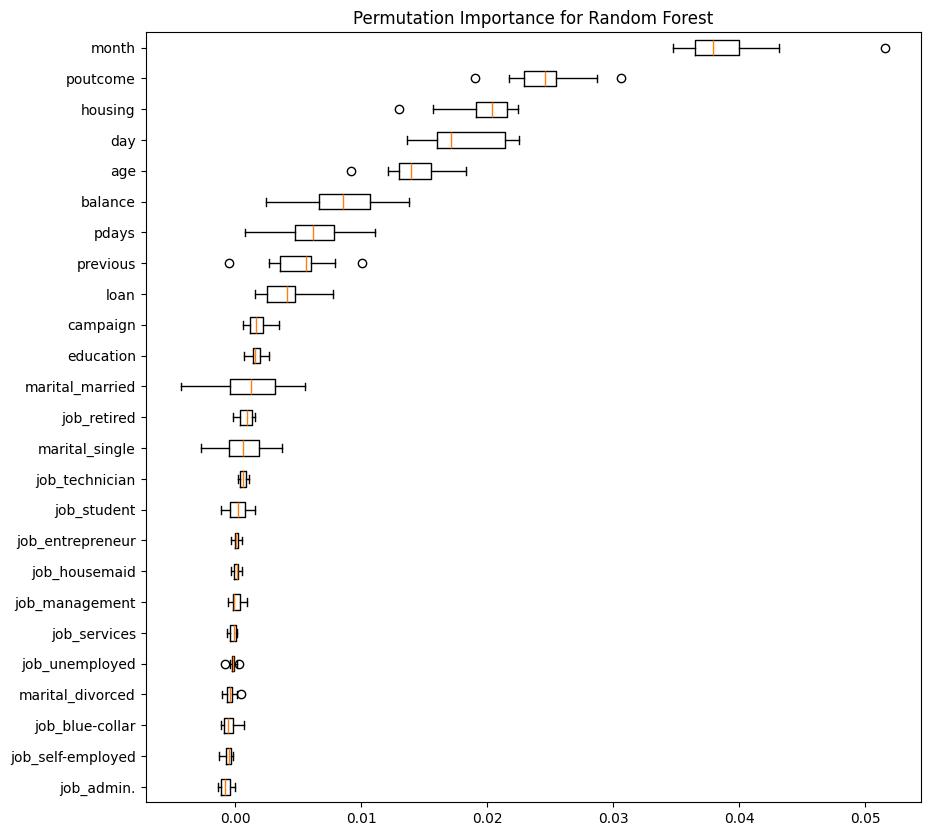

In [54]:
# Find importance of features in all 3 models using permutation importance

# SVM
result_svm = permutation_importance(grid_search_svm, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)  # Calculate permutation importance
sorted_idx = result_svm.importances_mean.argsort()  # Sort the importance values

plt.figure(figsize=(10, 10))
plt.boxplot(result_svm.importances[sorted_idx].T, vert=False, tick_labels=X_test_df.columns[sorted_idx])  # Plot the importance values using a boxplot to show the spread
plt.title('Permutation Importance for SVM')
plt.show()

# Neural Network
result_nn = permutation_importance(grid_search_nn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)    # Calculate permutation importance
sorted_idx = result_nn.importances_mean.argsort()   # Sort the importance values

plt.figure(figsize=(10, 10))
plt.boxplot(result_nn.importances[sorted_idx].T, vert=False, tick_labels=X_test_df.columns[sorted_idx])   # Plot the importance values using a boxplot to show the spread
plt.title('Permutation Importance for Neural Network')
plt.show()

# Random Forest
result_rf = permutation_importance(grid_search_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)   # Calculate permutation importance
sorted_idx = result_rf.importances_mean.argsort() # Sort the importance values

plt.figure(figsize=(10, 10))
plt.boxplot(result_rf.importances[sorted_idx].T, vert=False, tick_labels=X_test_df.columns[sorted_idx])  # Plot the importance values using a boxplot to show the spread
plt.title('Permutation Importance for Random Forest')
plt.show()

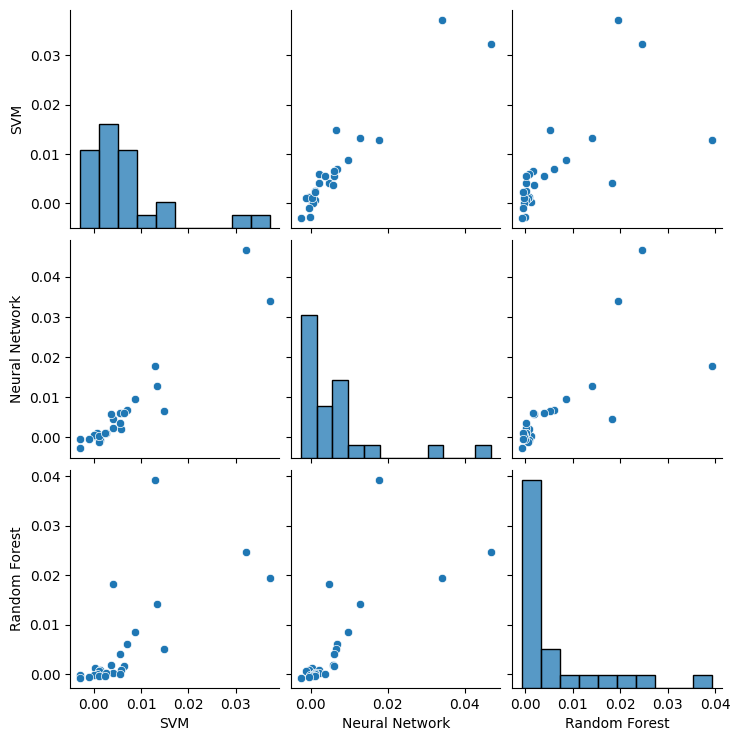

In [55]:
# Plot pairplot for the importances of features for the three models
importances = {'SVM': result_svm.importances_mean, 'Neural Network': result_nn.importances_mean, 'Random Forest': result_rf.importances_mean} # Create a dictionary of importances
importances_df = pd.DataFrame(importances, index=data_new.columns[:-1]) # Convert the dictionary to a dataframe

importances_df = importances_df.sort_values(by='Random Forest', ascending=False) # Sort the dataframe by the Random Forest importance values

sns.pairplot(importances_df)
plt.show()

As can be seen the importances of features across models are more or less the same except few outliers which is acceptable owing to the difference in optimisation techniques of different models

In [46]:
from sklearn.model_selection import cross_val_score     # For recursive feature elimination, we'll need cross-validation

In [47]:
X = data_new.drop('deposit', axis=1)    # To undo any changes made to X and y
y = data_new['deposit']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to dataframe
X_train = pd.DataFrame(X_train, columns=data_new.columns.drop('deposit'))
X_test = pd.DataFrame(X_test, columns=data_new.columns.drop('deposit'))

In [ ]:
# Recursive elimination for SVM
# Refernece (4)

# Load the best hyperparameters
svm_best_params = grid_search_svm.best_params_
svm = SVC(C = svm_best_params['C'], gamma = svm_best_params['gamma'], kernel = 'rbf', probability=True)     # Define the model

# Initialise best score and list for reduced features
best_score = grid_search_svm.best_score_
reduced_features = X_train.columns

while reduced_features.shape[0]>1:      # Repeat loop until theres only one feature in the model
    max_score = 0                       # Initialise max_score for each iteration of while loop
    curr_features = reduced_features    
    features_dropped = None             # Pointer to feature to be dropped 
    print(f'Evaluating Feature: {list(reduced_features)}, No. of features = {reduced_features.shape[0]}')
    for i in range(reduced_features.shape[0]):  # Loop over each element in the reduced features list
        temp_drop = reduced_features[i]         # Drop the selected element
        temp_features = reduced_features.drop(temp_drop)    
        X_train_dropped = X_train[temp_features]
        print(f'Testing: Removed Feature = {temp_drop}')
        # Evaluate score of new model after dropping feature
        curr_score = np.mean(cross_val_score(svm, X_train_dropped, y_train, cv=5, scoring='roc_auc', n_jobs = -1))
        
        if curr_score > max_score:      # Select the best model obtained after eliminating only one feature separately
            max_score = curr_score
            curr_features = temp_features
            features_dropped = temp_drop
        print(f'Tested: Removed Feature = {temp_drop}, Curr score = {curr_score}, Max score = {max_score}')
    if max_score > best_score:          # If the best model after eliminating one feature is better than the current model than we eliminate that feature
        reduced_features = curr_features
        best_score = max_score
        print(f'Feature Dropped: {features_dropped}')
    else:                               # If the best model after eliminating one feature isnt better than the current model than we do not eliminate any feature and terminate the process
        break

Evaluating Feature: ['age', 'education', 'balance', 'housing', 'loan', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single'], No. of features = 25
Testing: Removed Feature = age
Tested: Removed Feature = age, Curr score = 0.7243787238486066, Max score = 0.7243787238486066
Testing: Removed Feature = education
Tested: Removed Feature = education, Curr score = 0.7273977489753817, Max score = 0.7273977489753817
Testing: Removed Feature = balance
Tested: Removed Feature = balance, Curr score = 0.7254170680394942, Max score = 0.7273977489753817
Testing: Removed Feature = housing
Tested: Removed Feature = housing, Curr score = 0.7186675925331469, Max score = 0.7273977489753817
Testing: Removed Feature = loan
Tested: Removed Feature = loan, Cu

In [49]:
reduced_features_svm = reduced_features     # Store list of reduced features for SVM
# Print remaining features 
print(f'Remaining Feature: {reduced_features}')

Remaining Feature: Index(['age', 'education', 'balance', 'housing', 'loan', 'day', 'month',
       'campaign', 'pdays', 'previous', 'poutcome', 'job_housemaid',
       'job_self-employed', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_single'],
      dtype='object')


In [56]:
# Load the best hyperparameters
nn_best_params = grid_search_nn.best_params_
nn = MLPClassifier(hidden_layer_sizes=nn_best_params['hidden_layer_sizes'], alpha=nn_best_params['alpha'], activation='relu', max_iter=1000)

# Initialise best score and list for reduced features
best_score = grid_search_nn.best_score_
reduced_features = X_train.columns

while reduced_features.shape[0]>1:      # Repeat loop until theres only one feature in the model
    max_score = 0                       # Initialise max_score for each iteration of while loop
    curr_features = reduced_features    
    features_dropped = None             # Pointer to feature to be dropped 
    print(f'Evaluating Feature: {list(reduced_features)}, No. of features = {reduced_features.shape[0]}')
    for i in range(reduced_features.shape[0]):  # Loop over each element in the reduced features list
        temp_drop = reduced_features[i]         # Drop the selected element
        temp_features = reduced_features.drop(temp_drop)    
        X_train_dropped = X_train[temp_features]
        print(f'Testing: Removed Feature = {temp_drop}')
        # Evaluate score of new model after dropping feature
        curr_score = np.mean(cross_val_score(nn, X_train_dropped, y_train, cv=5, scoring='roc_auc', n_jobs = -1))
        
        if curr_score > max_score:      # Select the best model obtained after eliminating only one feature separately
            max_score = curr_score
            curr_features = temp_features
            features_dropped = temp_drop
        print(f'Tested: Removed Feature = {temp_drop}, Curr score = {curr_score}, Max score = {max_score}')
    if max_score > best_score:          # If the best model after eliminating one feature is better than the current model than we eliminate that feature
        reduced_features = curr_features
        best_score = max_score
        print(f'Feature Dropped: {features_dropped}')
    else:                               # If the best model after eliminating one feature isnt better than the current model than we do not eliminate any feature and terminate the process
        break

Evaluating Feature: ['age', 'education', 'balance', 'housing', 'loan', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single'], No. of features = 25
Testing: Removed Feature = age
Tested: Removed Feature = age, Curr score = 0.7335418611258575, Max score = 0.7335418611258575
Testing: Removed Feature = education
Tested: Removed Feature = education, Curr score = 0.7343708954205155, Max score = 0.7343708954205155
Testing: Removed Feature = balance
Tested: Removed Feature = balance, Curr score = 0.7335272457795149, Max score = 0.7343708954205155
Testing: Removed Feature = housing
Tested: Removed Feature = housing, Curr score = 0.7238910090552425, Max score = 0.7343708954205155
Testing: Removed Feature = loan
Tested: Removed Feature = loan, Cu

In [57]:
reduced_features_nn = reduced_features  # Store list of reduced features for NN
# Print remaining features 
print(f'Remaining Feature: {reduced_features}')

Remaining Feature: Index(['age', 'education', 'balance', 'housing', 'loan', 'day', 'month',
       'campaign', 'pdays', 'previous', 'poutcome', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single'],
      dtype='object')


In [58]:
from sklearn.feature_selection import RFECV     # Import RFECV for recursive elimination

rf_best_params = grid_search_rf.best_params_    # Load best params for rf
rf = RandomForestClassifier(max_depth = rf_best_params['max_depth'], max_features = rf_best_params['max_features'])     # Load the best model

rf_rfecv = RFECV(estimator = rf, step = 1, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose=2)         # Start Recursive Elimination    
rf_rfecv.fit(X_train, y_train)  # Fit the RFECV on the train data

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


RFECV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
      scoring='roc_auc', verbose=2)

In [59]:
print(f'Support Mask of RFECV: {rf_rfecv.support_}')    # Print the supposrt mask for the features

Support Mask of RFECV: [ True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False  True
 False]


In [60]:
# Extract the reduced features using the support mask
reduced_features_rf = [feature for feature, mask in zip(X_train.columns, rf_rfecv.support_) if mask]

print(f'Remaining Features: {reduced_features_rf}')

Remaining Features: ['age', 'education', 'balance', 'housing', 'loan', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'marital_married']


In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [62]:
# Testing of SVM Model on Validation set
X_train_svm = X_train[reduced_features_svm]
X_test_svm = X_test[reduced_features_svm]
model = svm.fit(X_train_svm, y_train)   # Train model on only the selected features

# Predict labels for test data
y_pred_svm = model.predict(X_test_svm)  # Predicted labels for accuracy etc
y_pred_prob_svm = model.predict_proba(X_test_svm)[:, 1]     # Probabilities for ROC-AUC score
print('SVM Results')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}')
print(f'Precison: {precision_score(y_test, y_pred_svm):.3f}')
print(f'Recall: {recall_score(y_test, y_pred_svm):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred_svm):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_prob_svm):.3f}')

SVM Results
Accuracy: 0.683
Precison: 0.703
Recall: 0.541
F1 Score: 0.611
ROC-AUC: 0.712


In [63]:
# Testing of NN Model on Validation set
X_train_nn = X_train[reduced_features_nn]
X_test_nn = X_test[reduced_features_nn]
model = nn.fit(X_train_nn, y_train)   # Train model on only the selected features

# Predict labels for test data
y_pred_nn = model.predict(X_test_nn)  # Predicted labels for accuracy etc
y_pred_prob_nn = model.predict_proba(X_test_nn)[:, 1]     # Probabilities for ROC-AUC score
print('NN Results')
print(f'Accuracy: {accuracy_score(y_test, y_pred_nn):.3f}')
print(f'Precison: {precision_score(y_test, y_pred_nn):.3f}')
print(f'Recall: {recall_score(y_test, y_pred_nn):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred_nn):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_prob_nn):.3f}')

NN Results
Accuracy: 0.678
Precison: 0.676
Recall: 0.581
F1 Score: 0.625
ROC-AUC: 0.722


In [64]:
# Testing of RF Model on Validation set
X_train_rf = X_train[reduced_features_rf]
X_test_rf = X_test[reduced_features_rf]
model = rf.fit(X_train_rf, y_train)   # Train model on only the selected features

# Predict labels for test data
y_pred_rf = model.predict(X_test_rf)  # Predicted labels for accuracy etc
y_pred_prob_rf = model.predict_proba(X_test_rf)[:, 1]     # Probabilities for ROC-AUC score
print('RF Results')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}')
print(f'Precison: {precision_score(y_test, y_pred_rf):.3f}')
print(f'Recall: {recall_score(y_test, y_pred_rf):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_prob_rf):.3f}')

RF Results
Accuracy: 0.718
Precison: 0.766
Recall: 0.560
F1 Score: 0.647
ROC-AUC: 0.753


## Pathological Tests

In [65]:
# Make train and test set for first pathological example    
X_train_path_1 = data_new.loc[~data_new['month'].isin([3, 4])].drop(columns=['deposit'])        # Months 3,4 correspond to June and July as we have started mapping of months with April = 1
y_train_path_1 = data_new.loc[~data_new['month'].isin([3, 4])]['deposit']

X_test_path_1 = data_new.loc[data_new['month'].isin([3, 4])].drop(columns = ['deposit'])
y_test_path_1 = data_new.loc[data_new['month'].isin([3, 4])]['deposit']

# Apply standard scaler to X_train_path_1 and X_test_path_1
scaler = StandardScaler()

X_train_path_1_scaled = scaler.fit_transform(X_train_path_1)
X_test_path_1_scaled = scaler.transform(X_test_path_1)

# Convert to Dataframes
X_train_path_1_df = pd.DataFrame(X_train_path_1_scaled, columns=X_train.columns)
X_test_path_1_df = pd.DataFrame(X_test_path_1_scaled, columns = X_train.columns)


In [66]:
# SVM 

# Extract reduced features obtained from previous analysis
X_train_path_1_svm = X_train_path_1_df[reduced_features_svm]
X_test_path_1_svm = X_test_path_1_df[reduced_features_svm]

# Fit Model 
model = svm.fit(X_train_path_1_svm, y_train_path_1)

# Predict labels for test data
y_pred_svm = model.predict(X_test_path_1_svm)  # Predicted labels for accuracy etc
y_pred_prob_svm = model.predict_proba(X_test_path_1_svm)[:, 1]     # Probabilities for ROC-AUC score
print('SVM Results')
print(f'Accuracy: {accuracy_score(y_test_path_1, y_pred_svm):.3f}')
print(f'Precison: {precision_score(y_test_path_1, y_pred_svm):.3f}')
print(f'Recall: {recall_score(y_test_path_1, y_pred_svm):.3f}')
print(f'F1 Score: {f1_score(y_test_path_1, y_pred_svm):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test_path_1, y_pred_prob_svm):.3f}')

SVM Results
Accuracy: 0.647
Precison: 0.610
Recall: 0.483
F1 Score: 0.539
ROC-AUC: 0.661


In [67]:
# NN

# Extract reduced features obtained from previous analysis
X_train_path_1_nn = X_train_path_1_df[reduced_features_nn]
X_test_path_1_nn = X_test_path_1_df[reduced_features_nn]

# Fit Model 
model = nn.fit(X_train_path_1_nn, y_train_path_1)

# Predict labels for test data
y_pred_nn = model.predict(X_test_path_1_nn)  # Predicted labels for accuracy etc
y_pred_prob_nn = model.predict_proba(X_test_path_1_nn)[:, 1]     # Probabilities for ROC-AUC score
print('NN Results')
print(f'Accuracy: {accuracy_score(y_test_path_1, y_pred_nn):.3f}')
print(f'Precison: {precision_score(y_test_path_1, y_pred_nn):.3f}')
print(f'Recall: {recall_score(y_test_path_1, y_pred_nn):.3f}')
print(f'F1 Score: {f1_score(y_test_path_1, y_pred_nn):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test_path_1, y_pred_prob_nn):.3f}')

NN Results
Accuracy: 0.666
Precison: 0.657
Recall: 0.457
F1 Score: 0.539
ROC-AUC: 0.674


In [68]:
# RF

# Extract reduced features obtained from previous analysis
X_train_path_1_rf = X_train_path_1_df[reduced_features_rf]
X_test_path_1_rf = X_test_path_1_df[reduced_features_rf]

# Fit Model 
model = rf.fit(X_train_path_1_rf, y_train_path_1)

# Predict labels for test data
y_pred_rf = model.predict(X_test_path_1_rf)  # Predicted labels for accuracy etc
y_pred_prob_rf = model.predict_proba(X_test_path_1_rf)[:, 1]     # Probabilities for ROC-AUC score
print('RF Results')
print(f'Accuracy: {accuracy_score(y_test_path_1, y_pred_rf):.3f}')
print(f'Precison: {precision_score(y_test_path_1, y_pred_rf):.3f}')
print(f'Recall: {recall_score(y_test_path_1, y_pred_rf):.3f}')
print(f'F1 Score: {f1_score(y_test_path_1, y_pred_rf):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test_path_1, y_pred_prob_rf):.3f}')

RF Results
Accuracy: 0.685
Precison: 0.713
Recall: 0.437
F1 Score: 0.542
ROC-AUC: 0.687


As we can see, all the models perform considerably worse in the given case due to the biased training dataset which is expected

In [69]:
# Make train and test set for first pathological example    
X_train_path_2 = data_new.loc[~data_new['job_technician'].isin([1])].drop(columns=['deposit'])        
y_train_path_2 = data_new.loc[~data_new['job_technician'].isin([1])]['deposit']

X_test_path_2 = data_new.loc[data_new['job_technician'].isin([1])].drop(columns = ['deposit'])
y_test_path_2 = data_new.loc[data_new['job_technician'].isin([1])]['deposit']

# Apply standard scaler to X_train_path_2 and X_test_path_2
scaler = StandardScaler()

X_train_path_2_scaled = scaler.fit_transform(X_train_path_2)
X_test_path_2_scaled = scaler.transform(X_test_path_2)

# Convert to Dataframes
X_train_path_2_df = pd.DataFrame(X_train_path_2_scaled, columns=X_train.columns)
X_test_path_2_df = pd.DataFrame(X_test_path_2_scaled, columns = X_train.columns)

In [70]:
# SVM 

# Extract reduced features obtained from previous analysis
X_train_path_2_svm = X_train_path_2_df[reduced_features_svm]
X_test_path_2_svm = X_test_path_2_df[reduced_features_svm]

# Fit Model 
model = svm.fit(X_train_path_2_svm, y_train_path_2)

# Predict labels for test data
y_pred_svm = model.predict(X_test_path_2_svm)  # Predicted labels for accuracy etc
y_pred_prob_svm = model.predict_proba(X_test_path_2_svm)[:, 1]     # Probabilities for ROC-AUC score
print('SVM Results')
print(f'Accuracy: {accuracy_score(y_test_path_2, y_pred_svm):.3f}')
print(f'Precison: {precision_score(y_test_path_2, y_pred_svm):.3f}')
print(f'Recall: {recall_score(y_test_path_2, y_pred_svm):.3f}')
print(f'F1 Score: {f1_score(y_test_path_2, y_pred_svm):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test_path_2, y_pred_prob_svm):.3f}')

SVM Results
Accuracy: 0.680
Precison: 0.728
Recall: 0.488
F1 Score: 0.585
ROC-AUC: 0.713


In [71]:
# NN

# Extract reduced features obtained from previous analysis
X_train_path_2_nn = X_train_path_2_df[reduced_features_nn]
X_test_path_2_nn = X_test_path_2_df[reduced_features_nn]

# Fit Model 
model = nn.fit(X_train_path_2_nn, y_train_path_2)

# Predict labels for test data
y_pred_nn = model.predict(X_test_path_2_nn)  # Predicted labels for accuracy etc
y_pred_prob_nn = model.predict_proba(X_test_path_2_nn)[:, 1]     # Probabilities for ROC-AUC score
print('NN Results')
print(f'Accuracy: {accuracy_score(y_test_path_2, y_pred_nn):.3f}')
print(f'Precison: {precision_score(y_test_path_2, y_pred_nn):.3f}')
print(f'Recall: {recall_score(y_test_path_2, y_pred_nn):.3f}')
print(f'F1 Score: {f1_score(y_test_path_2, y_pred_nn):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test_path_2, y_pred_prob_nn):.3f}')

NN Results
Accuracy: 0.685
Precison: 0.715
Recall: 0.528
F1 Score: 0.607
ROC-AUC: 0.720


In [72]:
# RF

# Extract reduced features obtained from previous analysis
X_train_path_2_rf = X_train_path_2_df[reduced_features_rf]
X_test_path_2_rf = X_test_path_2_df[reduced_features_rf]

# Fit Model 
model = rf.fit(X_train_path_2_rf, y_train_path_2)

# Predict labels for test data
y_pred_rf = model.predict(X_test_path_2_rf)  # Predicted labels for accuracy etc
y_pred_prob_rf = model.predict_proba(X_test_path_2_rf)[:, 1]     # Probabilities for ROC-AUC score
print('RF Results')
print(f'Accuracy: {accuracy_score(y_test_path_2, y_pred_rf):.3f}')
print(f'Precison: {precision_score(y_test_path_2, y_pred_rf):.3f}')
print(f'Recall: {recall_score(y_test_path_2, y_pred_rf):.3f}')
print(f'F1 Score: {f1_score(y_test_path_2, y_pred_rf):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test_path_2, y_pred_prob_rf):.3f}')

RF Results
Accuracy: 0.709
Precison: 0.773
Recall: 0.521
F1 Score: 0.623
ROC-AUC: 0.754


The results for this example match with the case where we randomly sampled the dataset for test examples. This could be due to low importance of the feature 'job_technician' (this feature is totally absent in the RF model). In such a case, separating the dataset into train and test sets based on it shouldn't make much of a difference on the results.

As far as business models are concerned, this model could be used but it should be used in conjunction with some other models too as these models have low recalls and high precision meaning its likely to miss out on True Positives (potential depositors) but will try to reduce False Positives (non-depositors being labelled as potential depositors). Due to this we need models which can detect True Positives more efficiently and then such models can be used in conjunction with our developed models.

# References
1. ChatGPT: Map a yes/no column in pandas df to binary
2. ChatGPT: Perform Grid Search for SVM
3. ChatGPT: Find feature importance for features in SVM 
4. Referred to a batchmate's code (Samar Perwez, 22B3913)